# Problem Set 1: Ex Ante Code

This notebook accompanies Problem Set 1. Together with it, you should have the file, `hst.py`. 

In [1]:
import numpy as np 
import pandas as pd 

# The game from Question 1

In [21]:
# the game from Question 1 in Problem Set 1
U1 = np.array([[5,3,1],
               [2,2,3],
               [2,1,0]])
U2 = np.array([[0,3,1],
               [4,2,1],
               [2,1,5]])
na1,na2 = U1.shape

In [3]:
# A helpful function for printing bimatrix games
def print_payoffs(U1, U2): 
    na1,na2 = U1.shape
    tuple_list = [[(U1[r,c],U2[r,c]) for c in range(na2)] for r in range(na1)]
    return pd.DataFrame(tuple_list) 

In [4]:
print_payoffs(U1, U2)

,0,1,2
0,"(5, 0)","(3, 3)","(1, 1)"
1,"(2, 4)","(2, 2)","(3, 1)"
2,"(2, 2)","(1, 1)","(0, 5)"


# Part 1: Coding up IESDS

## a) Checking for dominance "manually" 

First, write up a function that checks whether one action dominates another strictly for the row player. 

***Hints:*** 
* Use `np.all(U[1,:] > U[0,:])` to check if all elements of the second row is greater than the those of the first (elementwise). 

In [5]:
def check_dominance_for_1(U1):
    '''
    Input: 
        U1: (na1*na2) numpy array of utilities for the row player
    Returns: 
        dominated_actions: list of integers (or empty) for the dominated actions
    '''
    na1,na2 = U1.shape
    dominated_actions = []
    for a in range(na1):
        for a_ in range(na1): 
            if a_ == a: 
                continue
            if (U1[a, :] < U1[a_, :]).all():
                print(f'a={a} is strictly dominated by a={a_}')
                dominated_actions.append(a)
                break
    return dominated_actions

In [22]:
# Let's make copies to avoid changing the originals
u1 = U1.copy()
u2 = U2.copy()

In [23]:
a_del = check_dominance_for_1(u1)

a=2 is strictly dominated by a=0


In [24]:
a_keep = [a for a in range(u1.shape[0]) if a not in a_del]
u1 = u1[a_keep, :]
u2 = u2[a_keep, :]
print_payoffs(u1,u2)

,0,1,2
0,"(5, 0)","(3, 3)","(1, 1)"
1,"(2, 4)","(2, 2)","(3, 1)"


We can use a clever trick to avoid writing a `check_for_dominance_2` file for the column player: namely that if we transpose `U2`, then it is as if player 2 is choosing the rows. 

In [25]:
a_del = check_dominance_for_1(FILL IN)

a=2 is strictly dominated by a=1


In [26]:
a_keep = [a for a in range(u2.shape[1]) if a not in a_del]
u1 = u1[:, a_keep]
u2 = u2[:, a_keep]
print_payoffs(u1,u2)

,0,1
0,"(5, 0)","(3, 3)"
1,"(2, 4)","(2, 2)"


## b) The IESDS Algorithm

In [ ]:
def IESDS(U1_in, U2_in, maxit=100): 
    '''
    INPUTS: 
        U1_in, U2_in: two utility matrices with same dimensions, (na1,na2). 
        maxit: maximum number of iterations to run (to avoid infinite runtime). 
        
    OUTPUTS: U1, U2, aa1, aa2
        U1,U2: Reduced matrices, containing only the undominated actions 
        aa1,aa2: lists of integers corresponding to the rows in the *original* 
            utility matrices that have survived IESDS. 
    
    '''
    
    # make copies to avoid overwriting the original game 
    U1 = U1_in.copy()
    U2 = U2_in.copy()
    
    # the actions of the players
    na1,na2 = U1.shape 
    assert (U2.shape[0] == na1) & (U2.shape[1] == na2), f'Dimensions mismatch!'
    
    # lists of actions: we will be deleting the elements from these that turn out to be dominated
    aa1 = np.arange(na1) 
    aa2 = np.arange(na2)
    
    for it in range(maxit): # use a max number of iterations to avoid the algorithm running forever
        # to keep track of when we are done 
        d = False
        
        # check for player 1
        a_del = check_dominance_for_1(U1) # note that this function does not know that U1 has possibly been reduced
        a_keep = [] # FILL IN: the indices for the rows of the *current* matrices we should keep 
        
        # delete dominated actions and their rows 
        aa1 = aa1[a_keep]
        U1 = U1[a_keep, :]
        U2 = U2[a_keep, :]
        
        if something: 
            d = True   
        
        # check for player 2 
        a_del = check_dominance_for_1(FILL IN) # we can use a clever trick to check U2 as if it were the row player...
        a_keep = [] # FILL IN: indices for the *columns* we should keep 
        
        # delete dominated actions and their columns
        aa2 = aa2[a_keep] 
        U1 = U1[:, a_keep]
        U2 = U2[:, a_keep]
        
        if something: 
            d = True    
            
        if not d: 
            print(f'No further strategies to delete after {it} iterations')
            break 
        
    assert it < maxit, f'Algorithm did not finish'
    
    return U1, U2, aa1, aa2

In [12]:
u1, u2, aa1, aa2 = IESDS(U1, U2)
print_payoffs(u1, u2,) 

a=2 is strictly dominated by a=0
a=2 is strictly dominated by a=1
a=1 is strictly dominated by a=0
a=0 is strictly dominated by a=1
No further strategies to delete after 2 iterations


,0
0,"(3, 3)"


# Part 2: Last year's exam 

In [32]:
import hst 
import seaborn as sns 

Reading in the data using the external module

In [62]:
dat,playrates = hst.read_data()
decks = dat.columns.values # the names of the strategies 

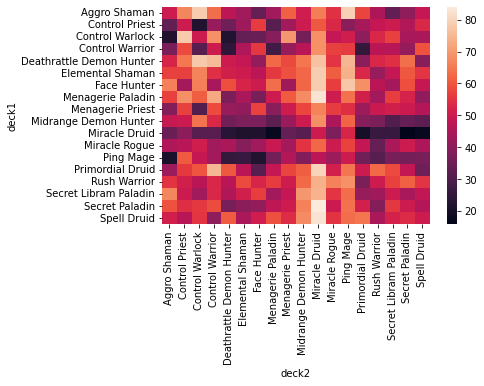

In [63]:
sns.heatmap(dat);

In [64]:
# set up utilities as a 2-player zero-sum game
U1 = dat.values 
U2 = -dat.values 

In [65]:
u1, u2, aa1, aa2 = IESDS(U1, U2)

a=9 is strictly dominated by a=4
a=10 is strictly dominated by a=0
a=11 is strictly dominated by a=5
a=12 is strictly dominated by a=4
a=9 is strictly dominated by a=4
a=10 is strictly dominated by a=0
a=11 is strictly dominated by a=5
a=12 is strictly dominated by a=4
No further strategies to delete after 1 iterations


Since the game is symmetric, `aa1` and `aa2` should be the same (so check this!). 

In [66]:
# print which strategies were dominated 
na1,na2 = U1.shape 
aa_dominated = [] # FILL IN: based on aa1 
print(f'Dominated strategies: {decks[aa_dominated]}')

Dominated strategies: ['Midrange Demon Hunter' 'Miracle Druid' 'Miracle Rogue' 'Ping Mage']


Plot the match winrates for the decks that survive IESDS

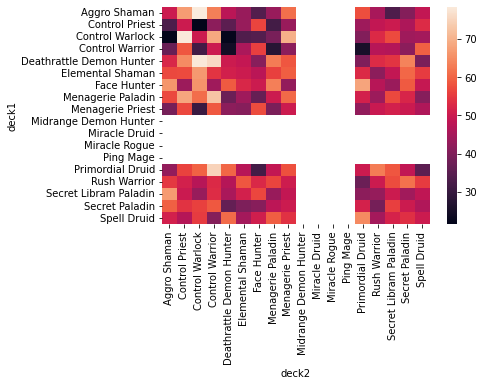

In [19]:
na1, na2 = dat.shape
iaa1 = [a for a in range(na1) if a not in aa1] 
iaa2 = [a for a in range(na2) if a not in aa2] 
dat2 = dat.copy()
dat2.iloc[iaa1, :] = np.nan
dat2.iloc[:, iaa2] = np.nan
sns.heatmap(dat2); 

Use `dat.iloc[]` to index rows and columns of the `dat` dataframe with the indices that came out of your `IESDS` algorithm. 

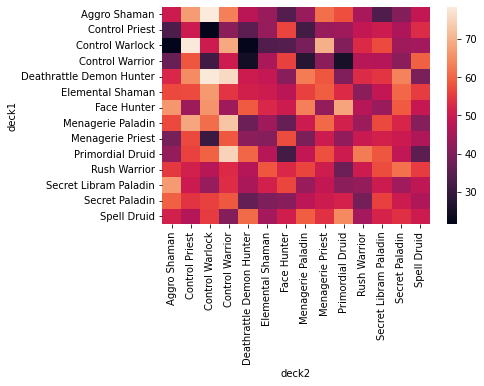

In [20]:
sns.heatmap(dat.iloc[aa1, aa2]); 